In [1]:
%cd /code
%load_ext autoreload
%autoreload 2

/code


In [2]:
import tensorflow as tf

GPU_MEMORY = 7000
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=GPU_MEMORY)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [103]:
from matplotlib import pyplot as plt

import numpy as np

from remsen.data import Dataset

In [4]:
dataset = Dataset()

In [5]:
# dataset.build_tile_cache(1000)

In [6]:
from notebooks.unet import model

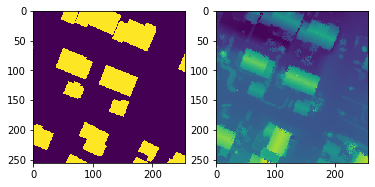

In [111]:
train = Dataset().tf_dataset().take(1000).batch(32).prefetch(256).repeat(10)
t = False
for x, y in train.take(1):
    fig, ax = plt.subplots(1, 2)
    ax[0].imshow(np.squeeze(y[0]))
    ax[1].imshow(np.squeeze(x[0]))
    plt.show()

In [118]:
model.fit(Dataset().tf_dataset().take(1).repeat(100).batch(1))

100/100 [==============================] - 5s 53ms/step - loss: 0.1605 - mean_io_u: 0.6441


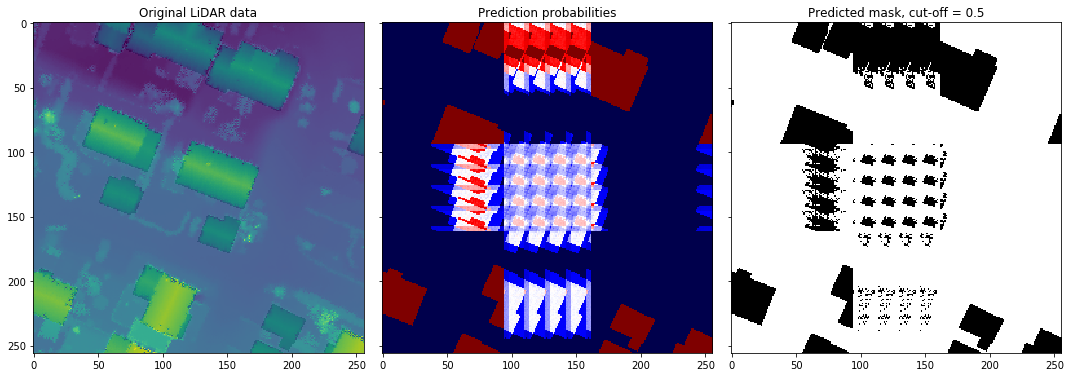

In [119]:
dataset.plot_prediction(model=model, cadastre_index=0)

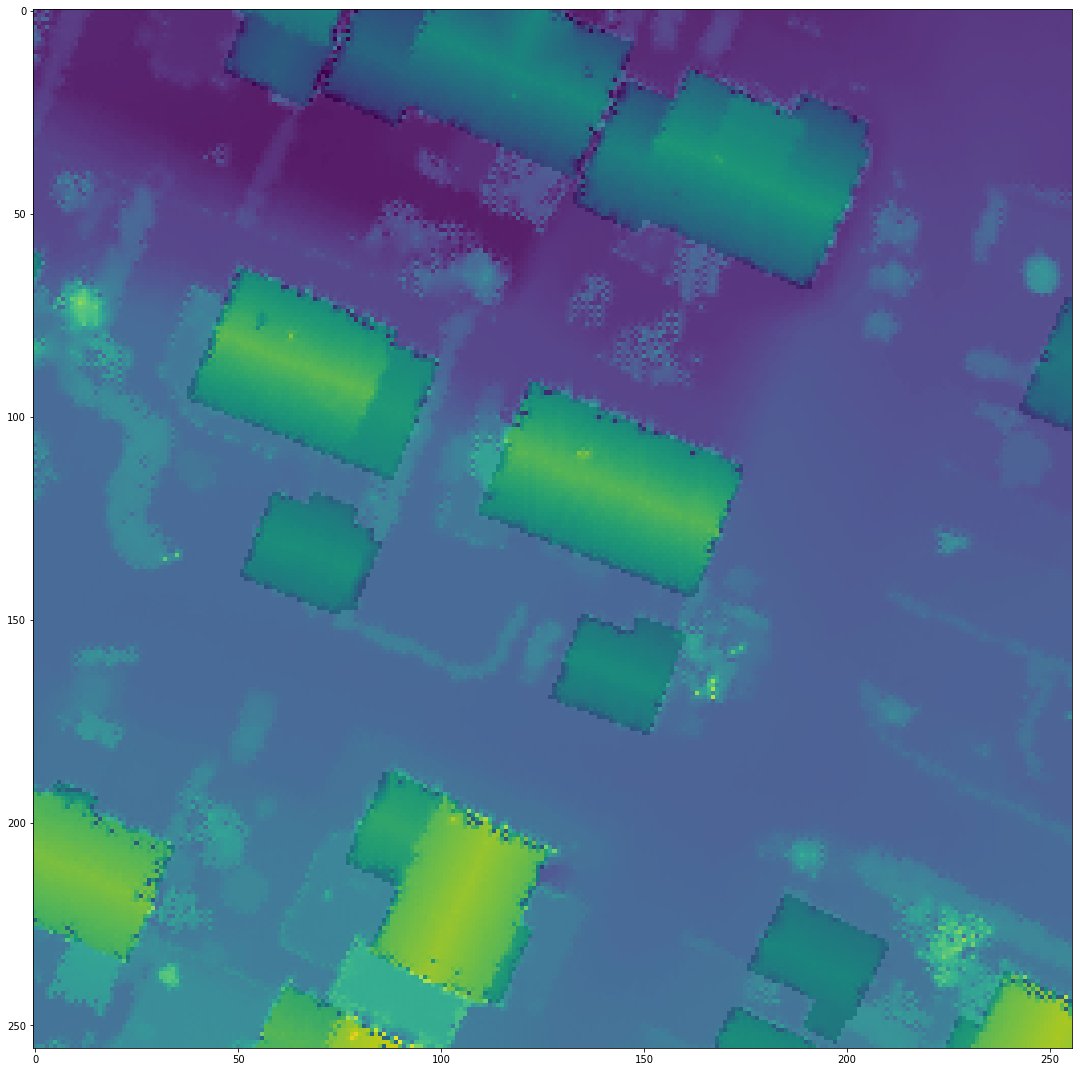

In [80]:
dataset.plot_tiles(0)

In [86]:
total = 0
empty = 0
for x, y in zip(*dataset[0:50]):
    total += 1
    empty = empty + 1 if y.sum() == 0 else empty
    
print(100 * empty / total)

76.16511318242344
